In [ ]:
from Non_Homophily_Large_Scale.dataset import *

# datanames = ['twitch-e', 'fb100', 'ogbn-proteins', 'deezer-europe', 'arxiv-year', 'pokec', 'snap-patents',
#              'yelp-chi', 'ogbn-arxiv', 'ogbn-products', 'Cora', 'CiteSeer', 'PubMed', 'chameleon', 'cornell',
#              'film', 'squirrel', 'texas', 'wisconsin', 'genius', 'twitch-gamer', 'wiki']
datanames = ['yelp-chi']

for data in datanames:
    dataset = load_nc_dataset(data)



In [ ]:
import torch
import random

# def random_select(tensor, K):
tensor = torch.zeros(10)
K = 5
indices = random.sample(range(10), K)  # 从 0 到 N-1 之间的索引中随机选择 K 个不重复的位置
tensor.view(-1)[indices] = True  # 将选中位置的值设为 1
tensor

In [ ]:
(tensor == 0)

In [1]:
import torch
from torch_geometric.data import Data
from utils import load_dataset, split_dataset
from model import GCN
datanames = ['twitch-e', 'fb100', 'ogbn-proteins', 'deezer-europe', 'arxiv-year', 'pokec', 'snap-patents',
             'yelp-chi', 'ogbn-arxiv', 'ogbn-products', 'Cora', 'CiteSeer', 'PubMed', 'chameleon', 'cornell',
             'film', 'squirrel', 'texas', 'wisconsin', 'genius', 'twitch-gamer', 'wiki']
# datanames = ['fb100']

# for data in datanames:
#     dataset = load_dataset(data)
#     print(data, len(dataset))
data = 'yelp-chi'
dataset = load_dataset(data)
split_dataset(dataset, 0.2, 0.8)

graph = dataset[0][0]
label = dataset.label
num_class = len(torch.unique(label))

In [7]:
for key in graph.keys():
    print(key=='node_feat')

False
True
False
False
False
False
False


In [15]:
A = torch.randn((6,2))
A = A / A.max()
A

tensor([[-0.7417, -0.4761],
        [ 0.1925, -0.0169],
        [ 0.2426,  0.0991],
        [ 0.1326,  0.4701],
        [ 1.0000, -0.5986],
        [ 0.3264,  0.3041]])

In [20]:
values, index = A.max(dim=1)
index

tensor([1, 0, 0, 1, 0, 0])

In [21]:
values > 0

tensor([False,  True,  True,  True,  True,  True])

In [29]:
G = Data(x=graph['node_feat'])
'pes' in G

False

In [35]:

torch.max(torch.tensor(10), torch.tensor(20))

tensor(20)

In [44]:
from tqdm import tqdm
progress_bar = tqdm(total=100, unit='iteration')
import time 
k = 0
while k<100:
    progress_bar.n = k
    progress_bar.refresh()
    k = k+torch.randint(0,5,(1,)).item()
    time.sleep(1)


 22%|██▏       | 22/100 [00:07<00:24,  3.14iteration/s]

KeyboardInterrupt: 

In [47]:
import torch
import torch.nn.functional as F

# 模型预测值
predictions = torch.tensor([[0.1, 0.2, 0.7], [0.8, 0.1, 0.1]])

# 真实标签
targets = torch.tensor([2, 0])

# 计算负对数似然损失
loss = F.nll_loss(predictions, targets)

print(loss)

tensor(-0.7500)


In [8]:
import torch

# 假设有一个N*2的概率张量
probabilities = torch.tensor([[0, 1], [0.6, 0.4], [0.3, 0.7]])

# 对概率张量进行采样
samples = torch.multinomial(probabilities, 1, replacement=True)

# 打印采样结果
print(samples)

tensor([[1],
        [1],
        [0]])


In [10]:
import torch
import torch.nn as nn

N, m, k = 3, 4, 2  # 假设的维度

# 假设有一个N*m维的张量X
X = torch.randn(N, m)

# 假设有一个N维的张量P
P = torch.tensor([0, 1, 0])

# 假设有一组MLP
mlps = nn.ModuleList([nn.Linear(m, k) for _ in range(N)])

# 将每一行的X通过对应的MLP进行前向传播
X_prime = torch.stack([mlps[i](X[i]) for i in P])

print(X_prime)

tensor([[ 0.5590,  0.0183],
        [ 0.2898, -0.6151],
        [ 0.5590,  0.0183]], grad_fn=<StackBackward0>)


In [3]:
import torch 
A = torch.randn((3,2))
A[1] = torch.tensor([1,2])

In [9]:
import torch

# 假设你的张量名为 tensor
tensor = torch.tensor([[1, 2, 3],
                       [4, 5, 6],
                       [1, 2, 3],
                       [7, 8, 9],
                       [4, 5, 6]])

# 使用 torch.unique 函数找到唯一的张量和索引
unique_tensor, inverse_indices = torch.unique(tensor, dim=0, return_inverse=True)

In [17]:
import pandas as pd 
df = pd.DataFrame()
dic = df.to_dict()
dic['fb100'] = {}
dic['fb100']['GCN'] = 1
df = pd.DataFrame(dic)

In [15]:
import torch
import torch.nn as nn
from torchviz import make_dot
from model import GCN
from utils import load_dataset,prepocessing

data = load_dataset('fb100')
graph = prepocessing(data)
# 创建模型实例
input_size = 1
output_size = 1
model = GCN(4814,32,2, num_layers=3, dropout=0.3)
model.eval()

# 前向传播获取输出
outputs = model(graph)

# 可视化计算图
make_dot(outputs, params=dict(model.named_parameters())).render("computational_graph")

Invalid sub_dataname, deferring to Penn94 graph


'computational_graph.pdf'

In [2]:
from collections import Counter

Counter('baabbcccs').values()

dict_values([3, 2, 3, 1])

In [13]:
import torch

# 示例tensor和batch大小
my_tensor = torch.tensor([False, True, False, True, True])
batch_size = 2

# 找到所有为True的索引
true_indices = torch.where(my_tensor)[0]

# 如果True的数量少于batch大小，取所有True；否则随机抽样
if len(true_indices) <= batch_size:
    selected_indices = true_indices
else:
    shuffled_indices = torch.randperm(len(true_indices))[:batch_size]
    selected_indices = true_indices[shuffled_indices]

# 输出结果
print("Selected indices:", selected_indices)


Selected indices: tensor([4, 1])


In [22]:
my_tensor = torch.tensor([False, True, False, True, True])

In [26]:
A = my_tensor.clone()
A[selected_indices] = False

In [27]:
A

tensor([False, False, False,  True, False])

In [25]:
A

tensor([False, False, False,  True, False])

In [9]:
import torch
from torch_geometric.data import Data

# 创建节点特征矩阵
x = torch.tensor([[1, 2], [3, 4], [5, 6]], dtype=torch.float)

# 创建边索引矩阵
edge_index = torch.tensor([[0, 1, 1, 2,3], [1, 0, 2, 1,4]], dtype=torch.long)

# 创建边特征矩阵（可选）
edge_attr = torch.tensor([[0.5], [1.0], [2.0], [1.5]], dtype=torch.float)

# 创建类别标签（可选）
y = torch.tensor([0, 1, 1], dtype=torch.long)

# 创建权重（可选）
weight = torch.tensor([0.1, 0.2, 0.3, 0.4], dtype=torch.float)

# 创建一个 Data 对象
data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y, weight=weight)

In [10]:
import torch
from torch_geometric.data import Data

def find_edges_connected_to_nodes(data, node_indices):

    node_indices = torch.tensor(node_indices)
    mask = (data.edge_index[0].unsqueeze(1) == node_indices) | (data.edge_index[1].unsqueeze(1) == node_indices)
    mask = mask.any(dim=1)
    edge_indices = mask.nonzero(as_tuple=False).view(-1)
    return edge_indices

# 示例
# 假设你的图数据对象是 `data`
# 假设要找的节点索引列表是 `node_indices`
node_indices = [0, 2]  # 你可以根据需要修改这个列表
edge_indices = find_edges_connected_to_nodes(data, node_indices)


In [3]:
import torch

edge_indices = torch.tensor([0,1,2,3])

In [1]:
import torch 
A = torch.randn((3,2))
B = torch.randn((3,2))


In [6]:
l = 0
torch.sum((A-B) * (A-B))/3

tensor(8.1151)

In [38]:
A = torch.tensor([2,3,1,5,4])
B = torch.tensor([[1,1],
                  [2,2],
                  [3,3],
                  [4,4],
                  [5,5]], dtype=float)
sorted_indices = torch.argsort(A)

In [39]:
B_sorted = B[sorted_indices]
tmp = B_sorted[:2]
C = [torch.zeros_like(B_sorted[:2]), B_sorted[2:]*0.7]

C = torch.cat(C)

In [40]:
tmp

tensor([[3., 3.],
        [1., 1.]], dtype=torch.float64)

In [41]:
indices = torch.argsort(sorted_indices)
C = C[indices]
C

tensor([[0.0000, 0.0000],
        [1.4000, 1.4000],
        [0.0000, 0.0000],
        [2.8000, 2.8000],
        [3.5000, 3.5000]], dtype=torch.float64)

In [42]:
sorted_indices

tensor([2, 0, 1, 4, 3])

In [45]:
import torch

# 假设 A 和 B 是两个 PyTorch tensor
A = torch.tensor([0, 1, 0, 3, 2, 3, 0])
B = torch.tensor([0, 0, 1, 1])

# 使用 A 作为索引从 B 中获取对应的值
A = B[A]


In [2]:
import numpy as np 
loss_list = np.load('loss.npy')
acc_list = np.load('acc.npy')
pseudo_loss_list = np.load('pseudo_loss.npy')

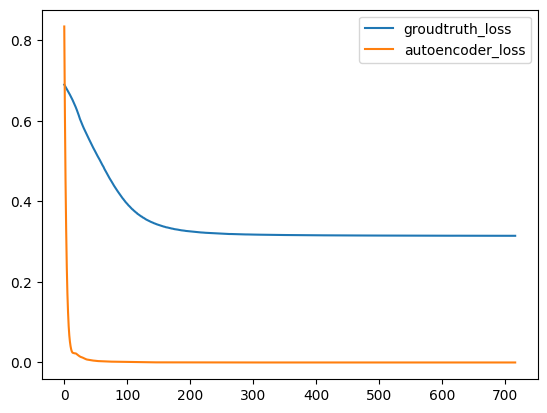

In [3]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(loss_list)), loss_list[:,0], label='groudtruth_loss')
plt.plot(np.arange(len(loss_list)), loss_list[:,1], label='autoencoder_loss')
plt.legend()

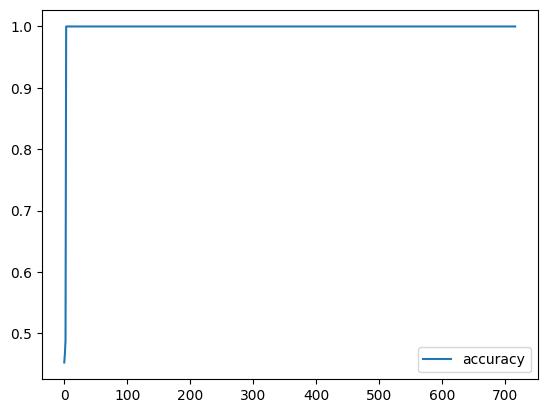

In [4]:
plt.plot(np.arange(len(acc_list)), acc_list, label='accuracy')
plt.legend()

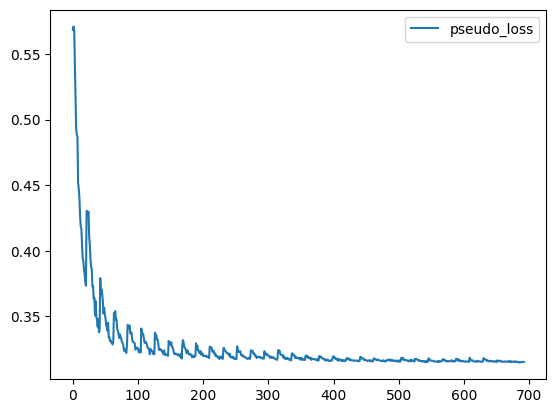

In [5]:
plt.plot(np.arange(len(pseudo_loss_list)), pseudo_loss_list, label='pseudo_loss')
plt.legend()